# Linear Regression on Automobile Dataset

## Dataset
This dataset contains information about various attributes/features of vehicles, including their specifications and prices. Each row represents a different vehicle.

**Description of the columns in the dataset:**

1. **make**: The make or brand of the vehicle.
2. **fuel_type**: The type of fuel used by the vehicle (e.g., gas, diesel).
3. **aspiration**: The type of aspiration system in the engine (e.g., std, turbo).
4. **num_of_doors**: The number of doors on the vehicle.
5. **body_style**: The style or type of body of the vehicle (e.g., sedan, hatchback).
6. **drive_wheels**: The type of drive wheels (e.g., fwd, rwd, 4wd).
7. **engine_location**: The location of the engine in the vehicle (e.g., front, rear).
8. **length**: The length of the vehicle.
9. **width**: The width of the vehicle.
10. **height**: The height of the vehicle.
11. **engine_type**: The type of engine (e.g., ohc, ohcf).
12. **num_of_cylinders**: The number of cylinders in the engine.
13. **engine_size**: The size of the engine (in cubic centimeters).
14. **compression_ratio**: The compression ratio of the engine.
15. **horsepower**: The horsepower of the vehicle.
16. **peak_rpm**: The peak revolutions per minute of the engine.
17. **city_mpg**: The city miles per gallon (fuel efficiency) of the vehicle.
18. **highway_mpg**: The highway miles per gallon (fuel efficiency) of the vehicle.
19. **price**: The price of the vehicle.



## The Objective

The objective is to be conducting exploratory data analysis (EDA) and building a simple linear regression model to understand the relationship between the predictor variables (such as `horsepower`) and the target variable (`price`) in the automotive dataset.

During this notebook, we aim to:

1. Load the dataset and inspect its structure, including the organization of data, column names, and data types.
2. Explore the dataset through descriptive statistics, data visualization, and correlation analysis to gain insights into the relationships between variables.
3. Build a simple linear regression model to predict the vehicle price based on one predictor variable (e.g., `horsepower`).
4. Evaluate the performance of the linear regression model using metrics such as R-squared and adjusted R-squared.
5. Visualize the relationship between the predictor variable and the target variable using scatter plots and regression lines.
6. Use the trained regression model to make predictions for new data points (e.g., predicting the price for a given horsepower value).


Show the directory where the datasets or notebook is currently located

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/autoscars/autos.txt


## Loading and Manipulating Data

**1. Import the dataset**

In [4]:
df = pd.read_csv('/kaggle/input/autoscars/autos.txt', sep='\t')

**2. Show the first five rows of the dataframe `df`**

In [5]:
df.head()

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,length,width,height,engine_type,num_of_cylinders,engine_size,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romeo,gas,std,two,convertible,rwd,front,168.8,64.1,48.8,dohc,four,130,9.0,111.0,5000.0,21,27,13495
1,alfa-romeo,gas,std,two,convertible,rwd,front,168.8,64.1,48.8,dohc,four,130,9.0,111.0,5000.0,21,27,16500
2,alfa-romeo,gas,std,two,hatchback,rwd,front,171.2,65.5,52.4,ohcv,six,152,9.0,154.0,5000.0,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,176.6,66.2,54.3,ohc,four,109,10.0,102.0,5500.0,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,176.6,66.4,54.3,ohc,five,136,8.0,115.0,5500.0,18,22,17450


- The first line represent the column names or headers of the dataset, which include various attributes such as :

In [6]:
df.columns

Index(['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style',
       'drive_wheels', 'engine_location', 'length', 'width', 'height',
       'engine_type', 'num_of_cylinders', 'engine_size', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

- The separator between columns is a tab character (\t).
- The decimal point used in numerical values is a dot (.) like :

In [8]:
df['length'][0]

168.8

- The shape of the data (the number of the observations and the features)

In [9]:
df.shape

(205, 19)

**3. Display the list of variables and their types**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               205 non-null    object 
 1   fuel_type          205 non-null    object 
 2   aspiration         205 non-null    object 
 3   num_of_doors       205 non-null    object 
 4   body_style         205 non-null    object 
 5   drive_wheels       205 non-null    object 
 6   engine_location    205 non-null    object 
 7   length             205 non-null    float64
 8   width              205 non-null    float64
 9   height             205 non-null    float64
 10  engine_type        205 non-null    object 
 11  num_of_cylinders   205 non-null    object 
 12  engine_size        205 non-null    int64  
 13  compression_ratio  205 non-null    float64
 14  horsepower         205 non-null    float64
 15  peak_rpm           205 non-null    float64
 16  city_mpg           205 non

From this output:

- The total number of rows is 205.
- The total number of variables is 19.
- There are 6 columns with floating-point (`float64`) data type.
- There are 4 columns with integer (`int64`) data type.
- There are 9 columns with object data type (`object`), which represents strings.
- The count for each column is 205, indicating that there are no missing values in the dataframe.


## Exploratory Data Analysis

**4. Descriptive statistics for each numerical column in `df`**

In [12]:
description = df.describe()
description

,length,width,height,engine_size,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,174.049268,65.907805,53.724878,126.907317,10.142439,104.256195,5125.369465,25.219512,30.751220,13207.126829
std,12.337289,2.145204,2.443522,41.642693,3.972060,39.519211,476.979093,6.542142,6.886443,7868.768212
min,141.100000,60.300000,47.800000,61.000000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,166.300000,64.100000,52.000000,97.000000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,173.200000,65.500000,54.100000,120.000000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,183.100000,66.900000,55.500000,141.000000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,208.100000,72.300000,59.800000,326.000000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


From this output:

- The mean, standard deviation, minimum, maximum, and percentiles are provided for each numerical column, giving an overview of the distribution of values.
- The numerical columns must be scaled to a standard range.

**5. Calculate the mean and standard deviation of the variable `price`**

In [18]:
mn = df['price'].mean()
sd = df['price'].std()
print(f'The mean of the price variable is {mn}')
print(f'The standard deviation of the price variable is {sd}')


The mean of the price variable is 13207.126829268293
The standard deviation of the price variable is 7868.76821236424


Anothor method the show the mean and std of the price feature is to use the `df.describe()` as  :
- `description['price']['mean']`
- `description['price']['std']`

**6. Calculate the frequency of vehicles according to `fuel_type`**

In [24]:
fuel_type_frequency = df['fuel_type'].value_counts()
fuel_type_frequency

fuel_type
gas       185
diesel     20
Name: count, dtype: int64

**7. Calculate the frequency of vehicles according to `aspiration`**

In [25]:
aspiration_frequency = df['aspiration'].value_counts()
aspiration_frequency

aspiration
std      168
turbo     37
Name: count, dtype: int64

**8. Display the frequency of vehicles according to `fuel_type` and `aspiration`**

In [28]:
import matplotlib.pyplot as plt


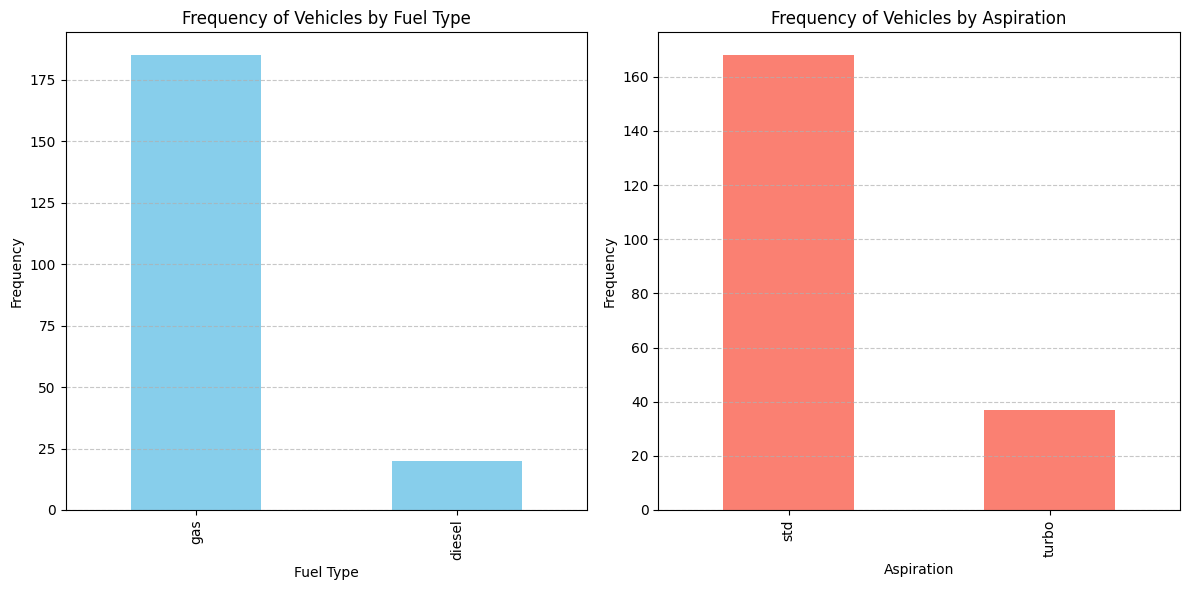

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


fuel_type_frequency.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Frequency of Vehicles by Fuel Type')
axes[0].set_xlabel('Fuel Type')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)


aspiration_frequency.plot(kind='bar', color='salmon', ax=axes[1])
axes[1].set_title('Frequency of Vehicles by Aspiration')
axes[1].set_xlabel('Aspiration')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


**9. Show the number of vehicles with `fuel_type = gas` and `aspiration = std`**



From the `value_counts()` of `fuel_type` and `aspiration`:
- Number of vehicles with `fuel_type = gas`: 185
- Number of vehicles with `aspiration = std`: 168

We can get the same result using
 - `df[df['fuel_type'] == 'gas'].shape[0]`
 - `df[df['aspiration'] == 'std'].shape[0]`
 
 If we want to show in same time the number of vehicles with `fuel_type = gas` and `aspiration = std` we can use 

In [37]:
df[(df['fuel_type'] == 'gas') & (df['aspiration'] == 'std')].shape[0]

161

## Correlation

**10. Create a scatter plot with `engine_size` on the x-axis and `price` on the y-axis**

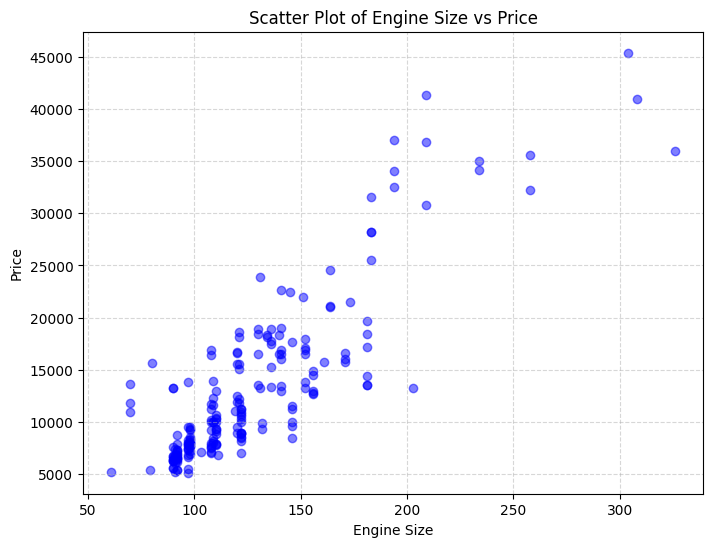

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(df['engine_size'], df['price'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Observations:

  -  As the engine size increases, there seems to be a general trend of higher prices.
  -  However, the relationship is perfectly linear, as there are variations in price for a given engine size.

**11. Calculate the correlation coefficient between the `engine_size` and `price`**

In [39]:
df['engine_size'].corr(df['price'])

0.861752231355783

The correlation coefficient is 0.86 which is close to 1 suggests that there is a strong linear relationship between  `engine_size` and `price`. This indicates a strong positive correlation between `engine_size` and `price`.

## Linear Regression

**12. Create the scatter plot between `horsepower` (x-axis) and `price` (y-axis)**

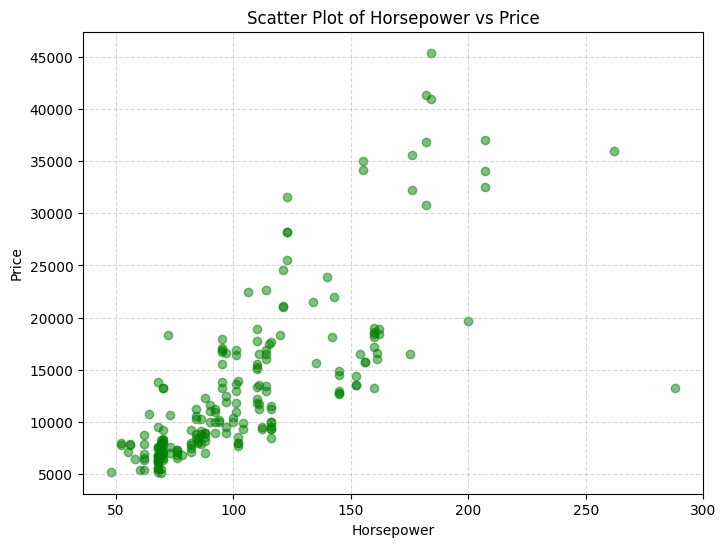

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(df['horsepower'], df['price'], color='green', alpha=0.5)
plt.title('Scatter Plot of Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Observations:

  -  As horsepower increases, there seems to be a general trend of higher prices.
  -  However, the relationship is not perfectly linear, as there are variations in price for a given horsepower.
  - There may be some outliers where vehicles have unusually high or low prices for their horsepower.

In [41]:
df['horsepower'].corr(df['price'])

0.7579161672743434

**13.  Identify the brand of the outlier and drop them from the DataFrame**

Based on previous graph, we can drop all rows with  `horsepower > 100  &  price > 14000`

In [85]:
outlier_brand = df[(df['horsepower'] > 100) & (df['price'] > 14000)]

outlier_make = outlier_brand['make'].unique()
print("brand of the outlier:", outlier_make)

df_cleaned = df.drop(outlier_brand.index)
df_cleaned.shape

brand of the outlier: ['alfa-romeo' 'audi' 'bmw' 'jaguar' 'mazda' 'mercedes-benz' 'mercury'
 'mitsubishi' 'nissan' 'peugot' 'porsche' 'saab' 'toyota' 'volvo']


(147, 19)

It isn't the good way to identify the outliers. The good method is to use the `IQR`

In [86]:
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

Q1_horsepower = df['horsepower'].quantile(0.25)
Q3_horsepower = df['horsepower'].quantile(0.75)
IQR_horsepower = Q3_horsepower - Q1_horsepower

lower_bound_horsepower = Q1_horsepower - 1.5 * IQR_horsepower
upper_bound_horsepower = Q3_horsepower + 1.5 * IQR_horsepower

outliers = df[(df['price'] < lower_bound_price) | (df['price'] > upper_bound_price) |
              (df['horsepower'] < lower_bound_horsepower) | (df['horsepower'] > upper_bound_horsepower)]


df_cleaned = df[~df.index.isin(outliers.index)]

print("Number of observations after removing outliers:", df_cleaned.shape[0])


Number of observations after removing outliers: 189


**14. Linear regression of "price" (Y) on "horsepower" (X)**

In [67]:
from sklearn.linear_model import LinearRegression

In [88]:
X = df_cleaned[['horsepower']]
Y = df_cleaned['price']

model = LinearRegression()
model.fit(X, Y)

a = model.coef_[0]
b = model.intercept_

print("Coefficient a:", a)
print("Coefficient b:", b)


Coefficient a: 118.60031791677316
Coefficient b: 1.7529567395740742


**15.  create a scatter plot between "horsepower" (x-axis) and "price" (y-axis) and add the regression line to the plot**

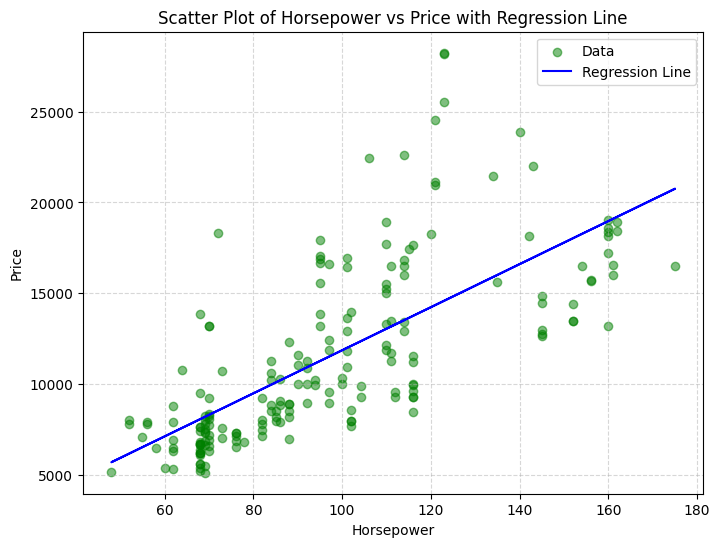

In [105]:
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='green', alpha=0.5, label='Data')

plt.plot(X, model.predict(X), color='blue', label='Regression Line')

plt.title('Scatter Plot of Horsepower vs Price with Regression Line')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**16. Calculate the coefficient of determination (R2) and R2-adjasted**

In [96]:
from sklearn.metrics import r2_score


R_squared = r2_score(Y, model.predict(X))

k = 1  # We have only one predictor, which is 'horsepower'
R_squared_adj = 1 - (1 - R_squared) * (len(Y) - 1) / (len(Y) - k - 1)

print("R-squared (R²):", R_squared)
print("Adjusted R-squared (R²_adj):", R_squared_adj)


R-squared (R²): 0.5006871119966264
Adjusted R-squared (R²_adj): 0.49801698960088636


## Predictions

**17.  Predict the value of "price" for a given value of "horsepower" = 100 using the linear regression model**

In [100]:
X_new = pd.DataFrame({'horsepower': [100]})
model.predict(X_new)

array([11861.78474842])

Another method is to use the coefficients $a$ and $b$

In [99]:
horsepower = 100
predicted_price = a * horsepower + b

print("Predicted price for horsepower = 100:", predicted_price)

Predicted price for horsepower = 100: 11861.78474841689


**18. Reconstruct the scatter plot of "horsepower" vs "price" with the regression line and the predicted point**

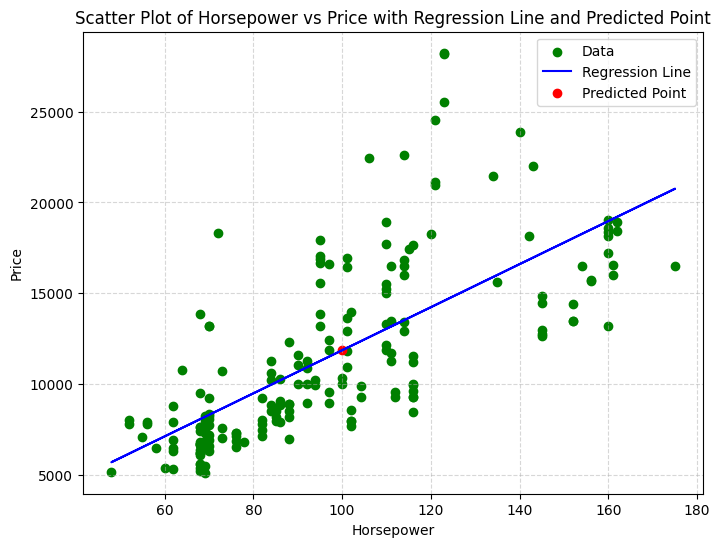

In [104]:
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='green', label='Data')

plt.plot(X, model.predict(X), color='blue', label='Regression Line')

plt.scatter(100, model.predict(X_new), color='red', label='Predicted Point')


plt.title('Scatter Plot of Horsepower vs Price with Regression Line and Predicted Point')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
